# Statistical Analysis of report

## Load report

In [1]:
import utils
import numpy as np
directory = r'C:/Users/s3628075/Study/Fujisaki/DataBase/enterface/All/'
report = utils.load_obj(directory+'Report.pkl')
fnames, params = zip(*report.items())
fnames = np.array(fnames)
Fb = a = b = I = J = Aa_all = Ap_all = np.empty(1)
for p in params:
    Fb= np.append(Fb, p['Fb'])
    a = np.append(a, p['a'])
    b = np.append(b, p['b'])
    I = np.append(I, p['I'])
    J = np.append(J, p['J'])
    Aa_all = np.append(Aa_all, p['Aa'])
    Ap_all = np.append(Ap_all, p['Ap'])
print("Loading report completed")

Loading report completed


## Look at how parameters are distributed across the whole corpus

Aa length: 5429; min_value: -3.6719; max_value: 9.0
Ap length: 1559; min_value: 0.0; max_value: 12.7218


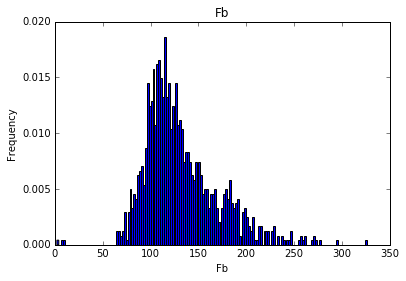

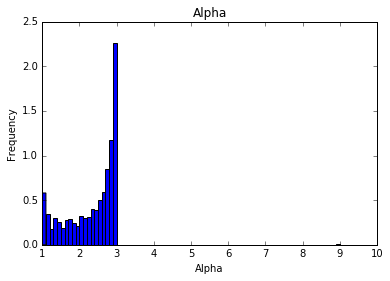

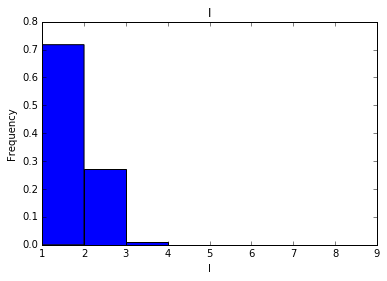

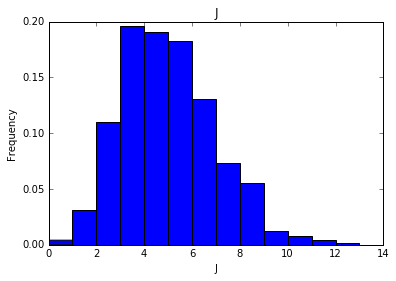

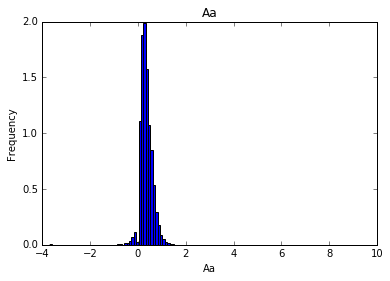

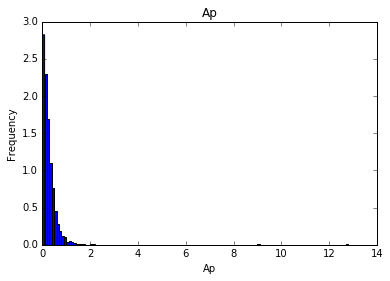

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
# plot Fb
hFb = utils.plot_hist(Fb, "Fb", 2.0)
# plot a
ha = utils.plot_hist(a, "Alpha", 0.1)
# plot I
hI = utils.plot_hist(I, "I", 1.0)
# plot J
hJ = utils.plot_hist(J, "J", 1.0)
# plot Aa
hAa = utils.plot_hist(Aa_all, "Aa", 0.1, verbose=True)
# plot Ap
hAp = utils.plot_hist(Ap_all, "Ap", 0.1, verbose=True)
plt.show()

## Calculate error

In [3]:
import fujisaki_utils as f_utils
subjects, emotions = f_utils.analyze(report)

s_3_su_1.PAC invalid literal for int() with base 10: ''
s_3_sa_3.PAC invalid literal for int() with base 10: ''
s_3_ha_3.PAC invalid literal for int() with base 10: ''
s_3_su_2.PAC invalid literal for int() with base 10: ''
s_3_fe_5.PAC invalid literal for int() with base 10: ''
s_3_ha_4.PAC invalid literal for int() with base 10: ''
s_3_sa_2.PAC invalid literal for int() with base 10: ''
s_3_sa_1.PAC invalid literal for int() with base 10: ''
s_3_su_5.PAC invalid literal for int() with base 10: ''
s_3_sa_5.PAC invalid literal for int() with base 10: ''
s_3_ha_5.PAC invalid literal for int() with base 10: ''
s_3_ha_1.PAC invalid literal for int() with base 10: ''
s_3_sa_4.PAC invalid literal for int() with base 10: ''
s_3_ha_2.PAC invalid literal for int() with base 10: ''
s_3_su_3.PAC invalid literal for int() with base 10: ''
s_3_su_4.PAC invalid literal for int() with base 10: ''


## Error distribution across emotions

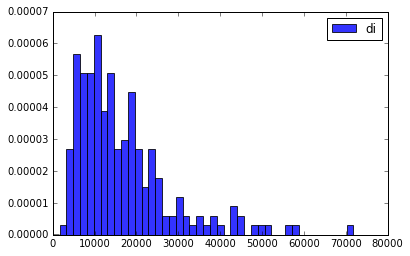

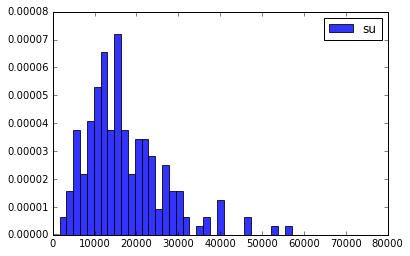

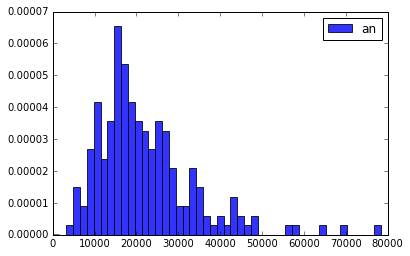

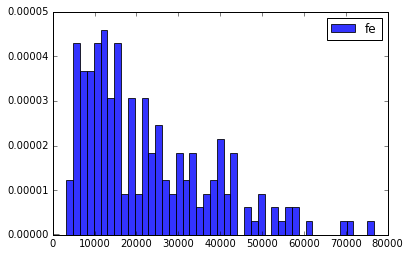

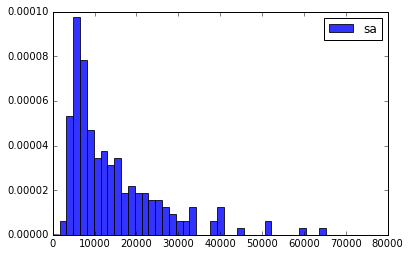

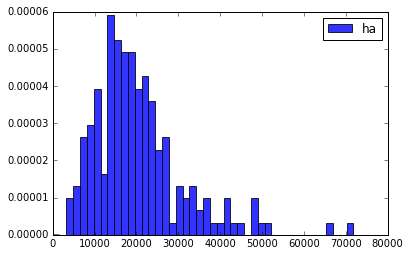

In [8]:
bins = np.linspace(0, 80000, 50) 
for key in emotions.keys():
    plt.hist(emotions[key], bins, alpha = 0.8, label=key, normed=True)
    plt.legend(loc = 'upper right')
    plt.show()


## Error distribution across subjects

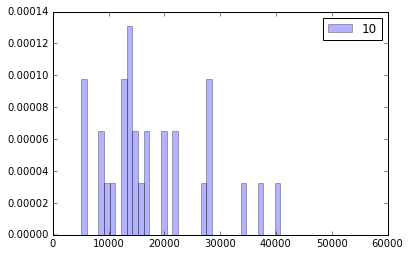

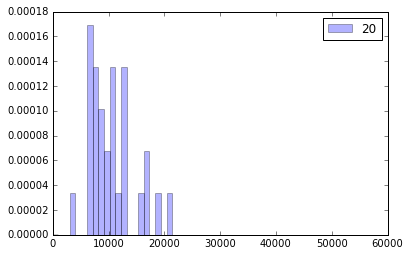

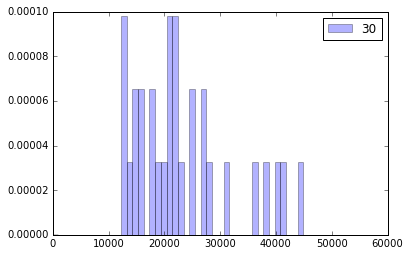

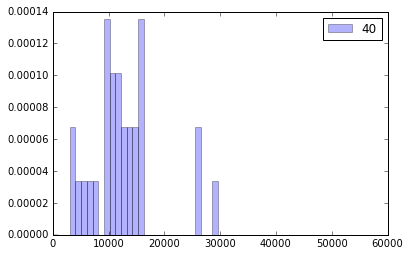

In [21]:
bins = np.linspace(0, 50000, 50) 
for key in subjects.keys():
    if key % 10 == 0:
        plt.hist(subjects[key], bins, alpha = 0.3, label=str(key), normed=True)
        plt.legend(loc = 'upper right')
        plt.show()